# Practice 4B: Linear Regression
### Diabetes dataset : regression problem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (1) Continue working on the Diabetes dataset exploited for Practice S_4A. In this case add to the dataset polynomial features of degree 3.

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

df=pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# column SEX is the encoding of a boolean, it does not make sense to include it in the polynomials

df_reduced = df.drop(columns=['sex'])

poly = PolynomialFeatures(3, include_bias=False)
df_reduced_poly= poly.fit_transform(df_reduced)

In [ ]:
df_poly = pd.concat([df['sex'], pd.DataFrame(df_reduced_poly, columns=poly.get_feature_names_out())], axis=1)
df_poly.head()

,sex,age,bmi,bp,s1,s2,s3,s4,s5,s6,age^2,age bmi,age bp,age s1,age s2,age s3,age s4,age s5,age s6,bmi^2,bmi bp,bmi s1,bmi s2,bmi s3,bmi s4,bmi s5,bmi s6,bp^2,bp s1,bp s2,bp s3,bp s4,bp s5,bp s6,s1^2,s1 s2,s1 s3,s1 s4,s1 s5,s1 s6,...,s1 s4 s5,s1 s4 s6,s1 s5^2,s1 s5 s6,s1 s6^2,s2^3,s2^2 s3,s2^2 s4,s2^2 s5,s2^2 s6,s2 s3^2,s2 s3 s4,s2 s3 s5,s2 s3 s6,s2 s4^2,s2 s4 s5,s2 s4 s6,s2 s5^2,s2 s5 s6,s2 s6^2,s3^3,s3^2 s4,s3^2 s5,s3^2 s6,s3 s4^2,s3 s4 s5,s3 s4 s6,s3 s5^2,s3 s5 s6,s3 s6^2,s4^3,s4^2 s5,s4^2 s6,s4 s5^2,s4 s5 s6,s4 s6^2,s5^3,s5^2 s6,s5 s6^2,s6^3
0,0.050680,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0.001450,0.002349,0.000833,-0.001684,-0.001326,-0.001653,-0.000099,0.000758,-0.000672,0.003806,0.001349,-0.002728,-0.002148,-0.002678,-0.000160,0.001228,-0.001089,0.000478,-0.000967,-0.000762,-0.000949,-0.000057,0.000435,-0.000386,0.001956,0.001540,0.001919,0.000115,-0.000880,0.000780,...,2.282279e-06,-2.022932e-06,-1.752777e-05,0.000016,-0.000014,-0.000042,-0.000053,-3.143080e-06,0.000024,-0.000021,-0.000066,-3.917557e-06,0.000030,-0.000027,-2.339893e-07,1.797024e-06,-0.000002,-1.380104e-05,0.000012,-0.000011,-8.175128e-05,-4.882871e-06,0.000038,-0.000033,-2.916460e-07,2.239824e-06,-1.985301e-06,-1.720172e-05,0.000015,-0.000014,-1.741954e-08,1.337810e-07,-1.185788e-07,-1.027431e-06,9.106785e-07,-8.071934e-07,7.890607e-06,-6.993957e-06,0.000006,-5.494752e-06
1,-0.044642,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0.000004,0.000097,0.000050,0.000016,0.000036,-0.000140,0.000074,0.000129,0.000174,0.002650,0.001355,0.000435,0.000986,-0.003830,0.002033,0.003517,0.004746,0.000693,0.000222,0.000505,-0.001959,0.001040,0.001799,0.002428,0.000071,0.000162,-0.000629,0.000334,0.000577,0.000779,...,-2.279950e-05,-3.076561e-05,-3.944670e-05,-0.000053,-0.000072,-0.000007,0.000027,-1.450330e-05,-0.000025,-0.000034,-0.000106,5.631654e-05,0.000097,0.000131,-2.988958e-05,-5.171367e-05,-0.000070,-8.947275e-05,-0.000121,-0.000163,4.120228e-04,-2.186781e-04,-0.000378,-0.000511,1.160617e-04,2.008050e-04,2.709660e-04,3.474242e-04,0.000469,0.000633,-6.159891e-05,-1.065758e-04,-1.438132e-04,-1.843928e-04,-2.488193e-04,-3.357564e-04,-3.190284e-04,-4.304965e-04,-0.000581,-7.838807e-04
2,0.050680,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,0.007276,0.003792,-0.000484,-0.003890,-0.002917,-0.002760,-0.000221,0.000244,-0.002212,0.001976,-0.000252,-0.002027,-0.001520,-0.001438,-0.000115,0.000127,-0.001153,0.000032,0.000259,0.000194,0.000183,0.000015,-0.000016,0.000147,0.002079,0.001559,0.001475,0.000118,-0.000131,0.001182,...,3.385141e-07,-3.065115e-06,-3.739694e-07,0.000003,-0.000031,-0.000040,-0.000038,-3.031032e-06,0.000003,-0.000030,-0.000036,-2.868063e-06,0.000003,-0.000029,-2.297807e-07,2.538475e-07,-0.000002,-2.804350e-07,0.000003,-0.000023,-3.387363e-05,-2.713856e-06,0.000003,-0.000027,-2.174261e-07,2.401989e-07,-2.174909e-06,-2.653569e-07,0.000002,-0.000022,-1.741954e-08,1.924403e-08,-1.742473e-07,-2.125961e-08,1.924976e-07,-1.742992e-06,2.348630e-08,-2.126594e-07,0.000002,-1.743511e-05
3,-0.044642,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,0.007932,0.001033,0.003265,-0.001086,-0.002226,0.003210,-0.003056,-0.002021,0.000834,0.000134,0.000425,-0.000141,-0.000290,0.000418,-0.000398,-0.000263,0.000109,0.001344,-0.000447,-0.000916,0.001321,-0.001258,-0.000832,0.000343,0.000149,0.000305,-0.000439,0.000418,0.000277,-0.000114,...,9.490814e-06,-3.915568e-06,6.277264e-06,-0.000003,0.000001,0.000016,-0.000023,2.142690e-05,0.000014,-0.000006,0.000032,-3.089857e-05,-0.000020,0.000008,2.941637e-05,1.945611e-05,-0.000008,1.286835e-05,-0.000005,0.000002,-4.680222e-05,4.455714e-05,0.000029,-0.000012,-4.241974e-05,-2.805660e-05,1.157514e-05,-1.855675e-05,0.000008,-0.000003,4.038488e-05,2.671073e-05,-1.101989e-05,1.766659e-05,-7.288598e-06,3.007013e-06,1.168476e-05,-4.820709e-06,0.000002,-8.205283e-07
4,-

In [ ]:
X=df_poly.values
y=data.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# (2) Use the Sklearn implementation of Linear Regression to find the best $\theta$ vector. Provide an interpretation of each hypothesis parameter in the trained model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict=lin_reg.predict(X_test)

In [ ]:
print("test MSE={}".format(mean_squared_error(y_test, y_predict)))
print("test R2={}".format(r2_score(y_test, y_predict)))

print("train MSE={}".format(mean_squared_error(y_train, lin_reg.predict(X_train))))
print("train R2={}".format(r2_score(y_train, lin_reg.predict(X_train))))

test MSE=68755.21542653156
test R2=-12.020539931916494
train MSE=956.544254583741
train R2=0.8453124212116909


In [ ]:
len(lin_reg.coef_)

220

Corfficients are 220, it is quite difficult to understand the trained hypotesis parameters. The model is difficult to interpret. From the $R^2$ score we can see that the model is performing quite well in the training set bu very bad in the test set, this means the model is overfitting the data. This might be given by the complexity of the model (model with high variance). 

#(3) Train a Linear Regression model with Ridge regularization. Iterate over different values of $\alpha$ in order to find the value which minimize the test-MSE.

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

Minimum test-MSE = 2756.76243336323


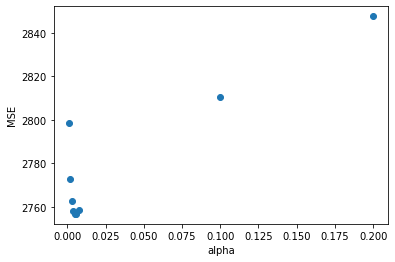

In [ ]:
alphas=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.1, 0.2]
mse_values=[]

for alpha in alphas:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train, y_train)
  y_predict=ridge_model.predict(X_test)
  mse_values.append(mean_squared_error(y_test, y_predict))

plt.scatter(alphas, mse_values)
plt.xlabel('alpha')
plt.ylabel("MSE")

print("Minimum test-MSE = {}".format(np.min(mse_values)))

The value of $\alpha$ that minimises the MSE on the test set os $\alpha = 0.005$. The related MSE is $3017$, which is much lower than the value calculated with the Linear Regression without regularization ($9517292$).

# (4) Train a Linear Regression model with Lasso regularization. Iterate over different values of $\alpha$ in order to find the value which minimize the test-MSE. Provide an interpretation of each hypothesis parameter in the trained model.

In [ ]:
from sklearn.linear_model import Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.343e+05, tolerance: 1.911e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+04, tolerance: 1.911e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Minimum test-MSE = 2751.2081175057997


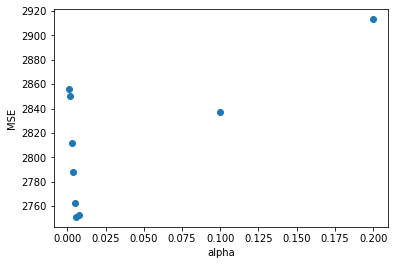

In [ ]:
alphas=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.1, 0.2]
mse_values=[]

for alpha in alphas:
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train, y_train)
  y_predict=lasso_model.predict(X_test)
  mse_values.append(mean_squared_error(y_test, y_predict))

plt.scatter(alphas, mse_values)
plt.xlabel('alpha')
plt.ylabel("MSE")

print("Minimum test-MSE = {}".format(np.min(mse_values)))

The value of $\alpha$ that minimises the MSE on the test set os $\alpha = 0.008$. The related MSE is $2977$, which is slightly lower than the value calculated with the Ridge Regression ($3017$).

In [ ]:
best_lasso_model = Lasso(alpha=0.008)
best_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.008)

In [ ]:
sum((best_lasso_model.coef_!=0))

14

The number of non zero features is 18. These features have the highest relevance to the task which we are performing. The model is more interpretable than the model trained on 220 features. 

In [ ]:
all_columns = pd.DataFrame(df_poly.columns, columns=["columns"])
non_zero_columns=all_columns[best_lasso_model.coef_!=0]
#non_zero_columns

In [ ]:
all_coeff = pd.DataFrame(best_lasso_model.coef_, columns=["coeff"])
non_zero_coeff=all_coeff[best_lasso_model.coef_!=0]
#non_zero_coeff

In [ ]:
parameters=pd.concat([non_zero_columns, non_zero_coeff], axis=1)
print(parameters)

   columns        coeff
0      sex  -160.457067
1      age    87.536472
2      bmi   395.050207
3       bp   373.117291
4       s1  -399.573760
5       s2   192.342286
6       s3  -112.936934
7       s4    80.390203
8       s5   657.243019
9       s6    17.148102
18  age s6    73.083841
19   bmi^2  1015.108449
20  bmi bp  1402.606838
54    s6^2  1151.629896


In [ ]:
parameters.sort_values(by=["coeff"])

,columns,coeff
4,s1,-399.573760
0,sex,-160.457067
6,s3,-112.936934
9,s6,17.148102
18,age s6,73.083841
7,s4,80.390203
1,age,87.536472
5,s2,192.342286
3,bp,373.117291
2,bmi,395.050207


Features having highest himpact on the final prediction are `["bmi bp", "s6^2", "bmi^2", "s5"]`